# Real-Time Data Visualization Dashboard

In [8]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [9]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import random

def generate_data():
    return pd.DataFrame({
        'timestamp': pd.date_range(start='2022-01-01', periods=100, freq='h'),
        'value': [random.randint(0, 100) for _ in range(100)]
    })

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Real-Time Line Chart"),
    dcc.Graph(id='plot'),
    dcc.Interval(id='interval', interval=1000, n_intervals=0)
])

@app.callback(Output('plot', 'figure'), Input('interval', 'n_intervals'))
def update(n):
    df = generate_data()
    return px.line(df, x='timestamp', y='value', title='Live Data')

if __name__ == '__main__':
    app.run(debug=True)


# Time Series Forecasting with ARIMA

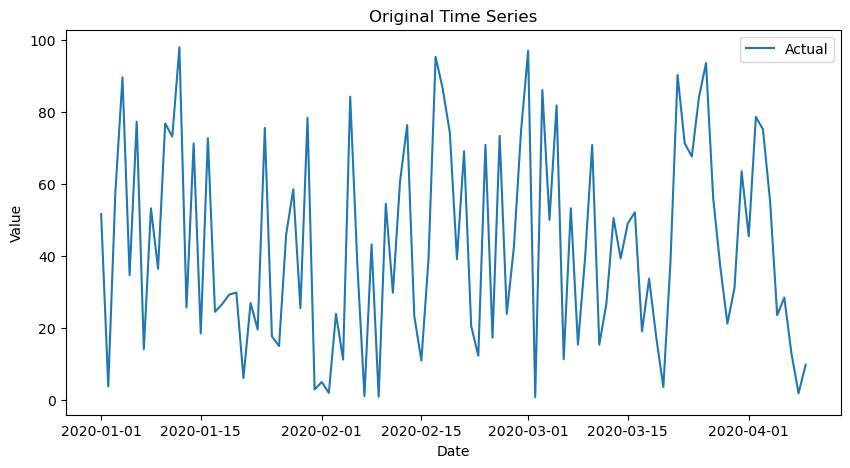

Mean Squared Error: 1019.89


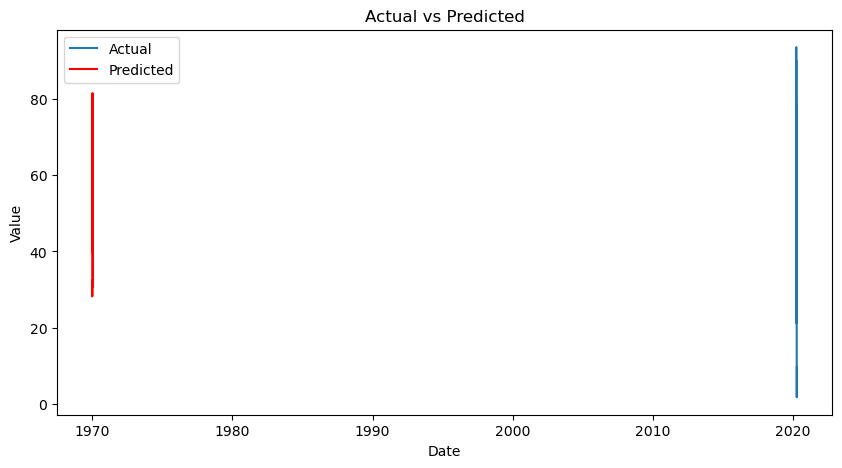

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Generate random time series data
def generate_data():
    dates = pd.date_range(start='2020-01-01', periods=100)
    values = np.random.rand(100) * 100
    return pd.Series(values, index=dates)

# Plot original and predicted series
def plot_series(actual, predicted=None, title='Time Series'):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual')
    if predicted is not None:
        plt.plot(predicted, label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Train-test split
def split_series(series, ratio=0.8):
    split = int(len(series) * ratio)
    return series[:split], series[split:]

# ARIMA forecasting
def forecast_arima(train, test, order=(5, 1, 0)):
    history = list(train)
    preds = []
    for t in test:
        model = ARIMA(history, order=order).fit()
        pred = model.forecast()[0]
        preds.append(pred)
        history.append(t)
    return preds


def main():
    series = generate_data()
    plot_series(series, title='Original Time Series')
    
    train, test = split_series(series)
    preds = forecast_arima(train, test)
    
    print(f'Mean Squared Error: {mean_squared_error(test, preds):.2f}')
    plot_series(test, preds, title='Actual vs Predicted')

if __name__ == "__main__":
    main()
